In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

In [84]:
fifa=pd.read_csv("fifa_stats.csv")
mobile=pd.read_csv("phone.csv")

In [13]:
fifa.info() ## To learn more about the information of the given dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      2000 non-null   object 
 1   Age                       2000 non-null   int64  
 2   Nationality               2000 non-null   object 
 3   Overall_rating            2000 non-null   int64  
 4   Potential                 2000 non-null   int64  
 5   Club                      1981 non-null   object 
 6   Preferred Foot            2000 non-null   object 
 7   International Reputation  2000 non-null   int64  
 8   Weak Foot                 2000 non-null   int64  
 9   Skill Moves               2000 non-null   int64  
 10  Work Rate                 2000 non-null   object 
 11  Position                  2000 non-null   object 
 12  Jersey Number             2000 non-null   int64  
 13  Height                    2000 non-null   float64
 14  Weight  

In [16]:
fifa.describe()
## Statistical summary of the data

,Age,Overall_rating,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Height,Weight
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,27.231500,78.197000,80.303500,1.774500,3.204000,2.919500,15.205500,5.781042,169.478000
std,3.859061,3.285969,4.114104,0.811775,0.728457,0.964098,13.210508,0.443337,16.050306
min,17.000000,75.000000,75.000000,1.000000,1.000000,1.000000,1.000000,5.083333,123.000000
25%,24.000000,76.000000,77.000000,1.000000,3.000000,2.000000,7.000000,5.500000,159.000000
50%,27.000000,77.000000,80.000000,2.000000,3.000000,3.000000,12.000000,6.000000,170.000000
75%,30.000000,80.000000,83.000000,2.000000,4.000000,4.000000,20.000000,6.166667,181.000000
max,41.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,6.583333,227.000000


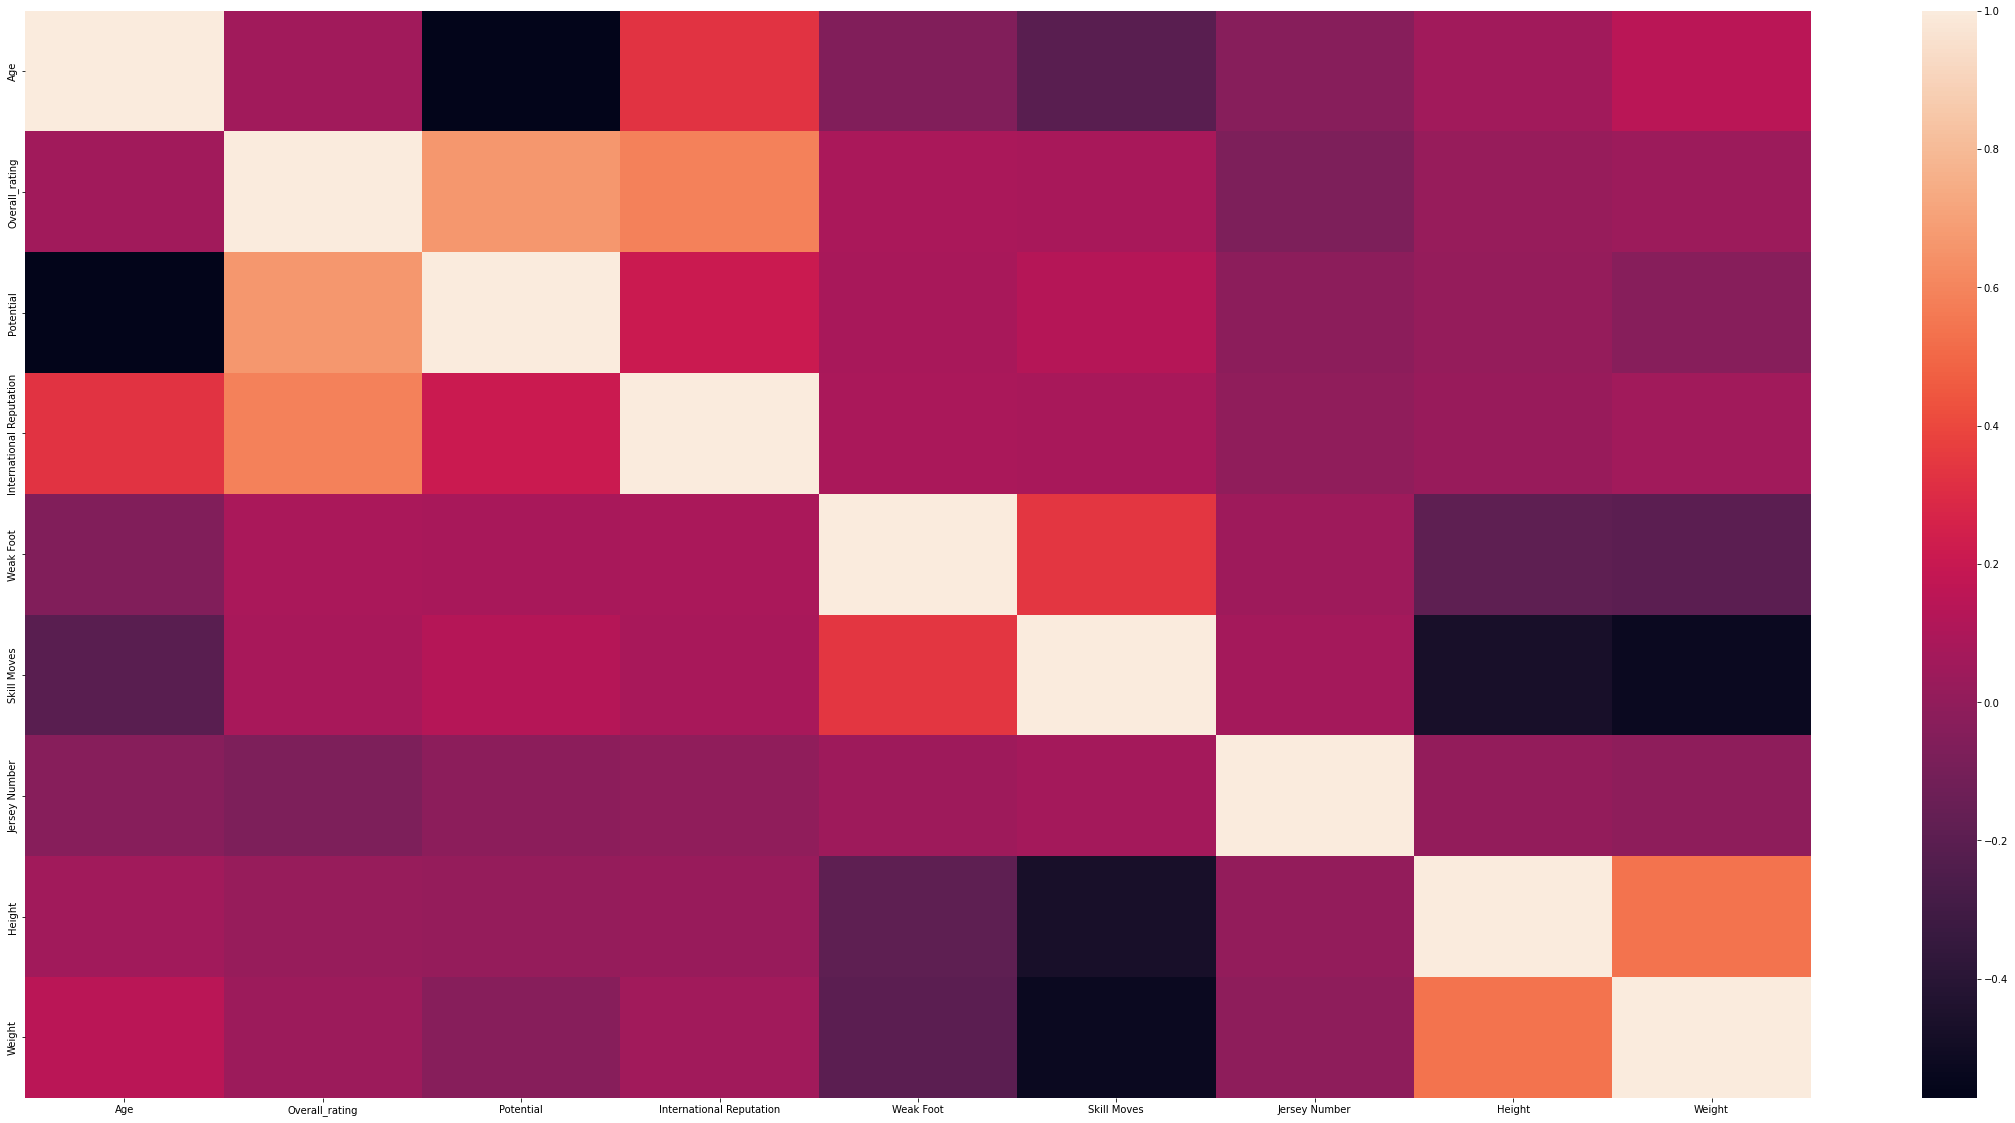

In [70]:
sns.heatmap(fifa.corr())
plt.show()

In [20]:
num=fifa.select_dtypes(include=np.number).columns
num

Index(['Age', 'Overall_rating', 'Potential', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Jersey Number', 'Height', 'Weight'],
      dtype='object')

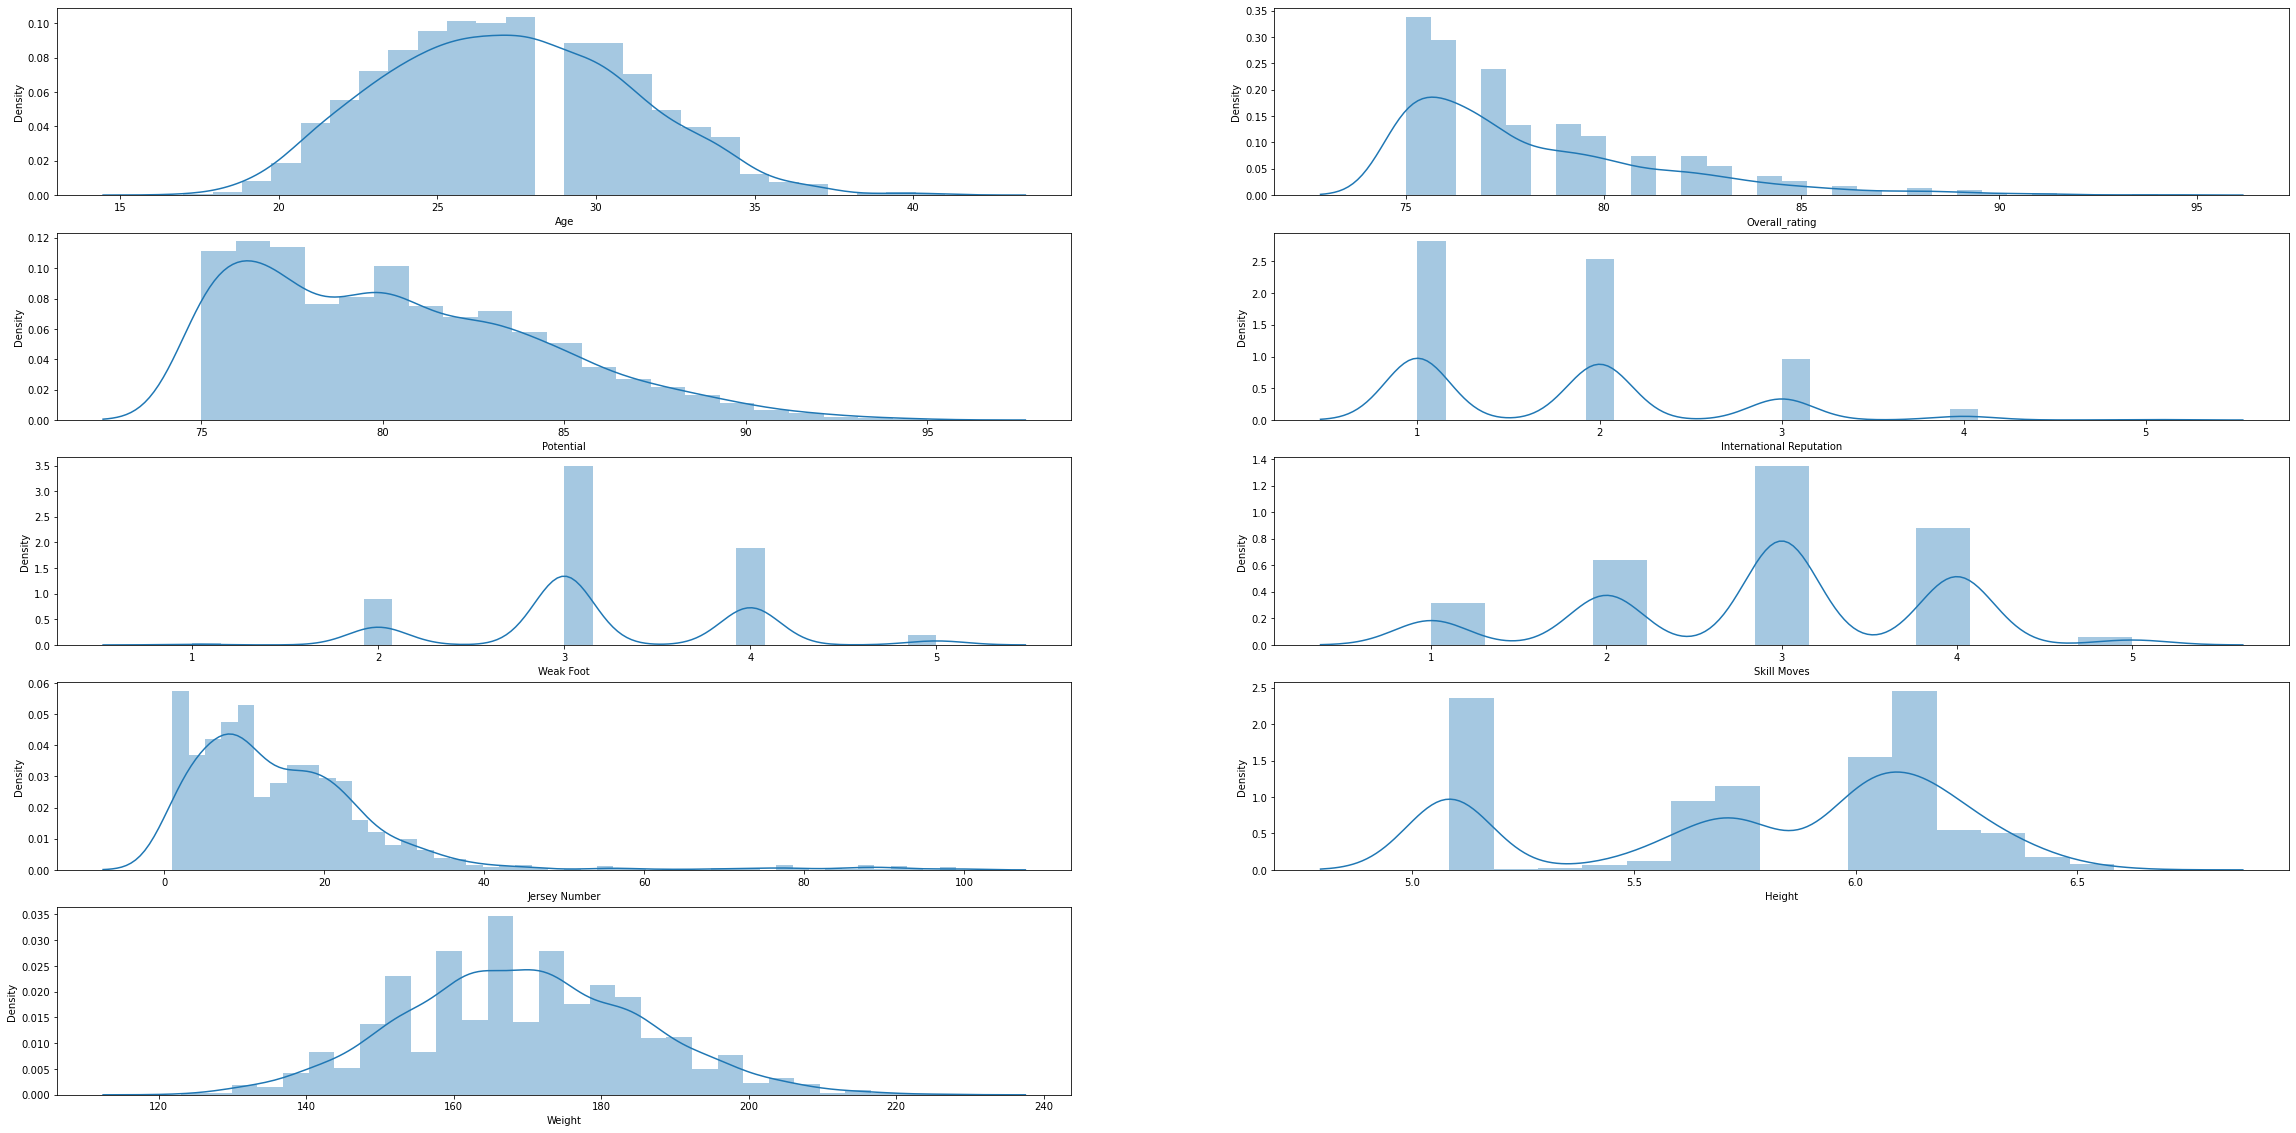

In [28]:
rows=5
cols=2
counter=1
plt.rcParams['figure.figsize']=[40,20]
for i in num:
    plt.subplot(rows,cols,counter)
    sns.distplot(fifa.loc[:,i].dropna())
    plt.xticks()
    counter+=1
    
plt.tight_layout
plt.show()

In [57]:

fifa.Club.fillna("Not_Known", inplace=True)

##Replacing null values in the club column with Not_known

# Basic Exploratory Data analysis with Visual Analysis

In [72]:
fifa.head()

,Name,Age,Nationality,Overall_rating,Potential,Club,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Jersey Number,Height,Weight
0,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,4,4,Medium/ Medium,RF,10,5.583333,159
41,G. Buffon,40,Italy,88,88,Paris Saint-Germain,Right,4,2,1,Medium/ Medium,GK,1,6.333333,203
46,K. Navas,31,Costa Rica,87,87,Real Madrid,Right,3,3,1,Medium/ Medium,GK,1,6.083333,176
48,C. Immobile,28,Italy,87,87,Lazio,Right,3,4,3,High/ Medium,ST,17,6.083333,187
49,Jordi Alba,29,Spain,87,87,FC Barcelona,Left,3,3,3,High/ Medium,LB,18,5.583333,150


In [73]:
# Dropping the Unnecessary columns from the data::
fifa.drop(columns='Jersey Number',inplace=True)

In [ ]:
cat=['Preferred Foot', 'Work Rate', 'Position']

ValueError: num must be 1 <= num <= 4, not 5

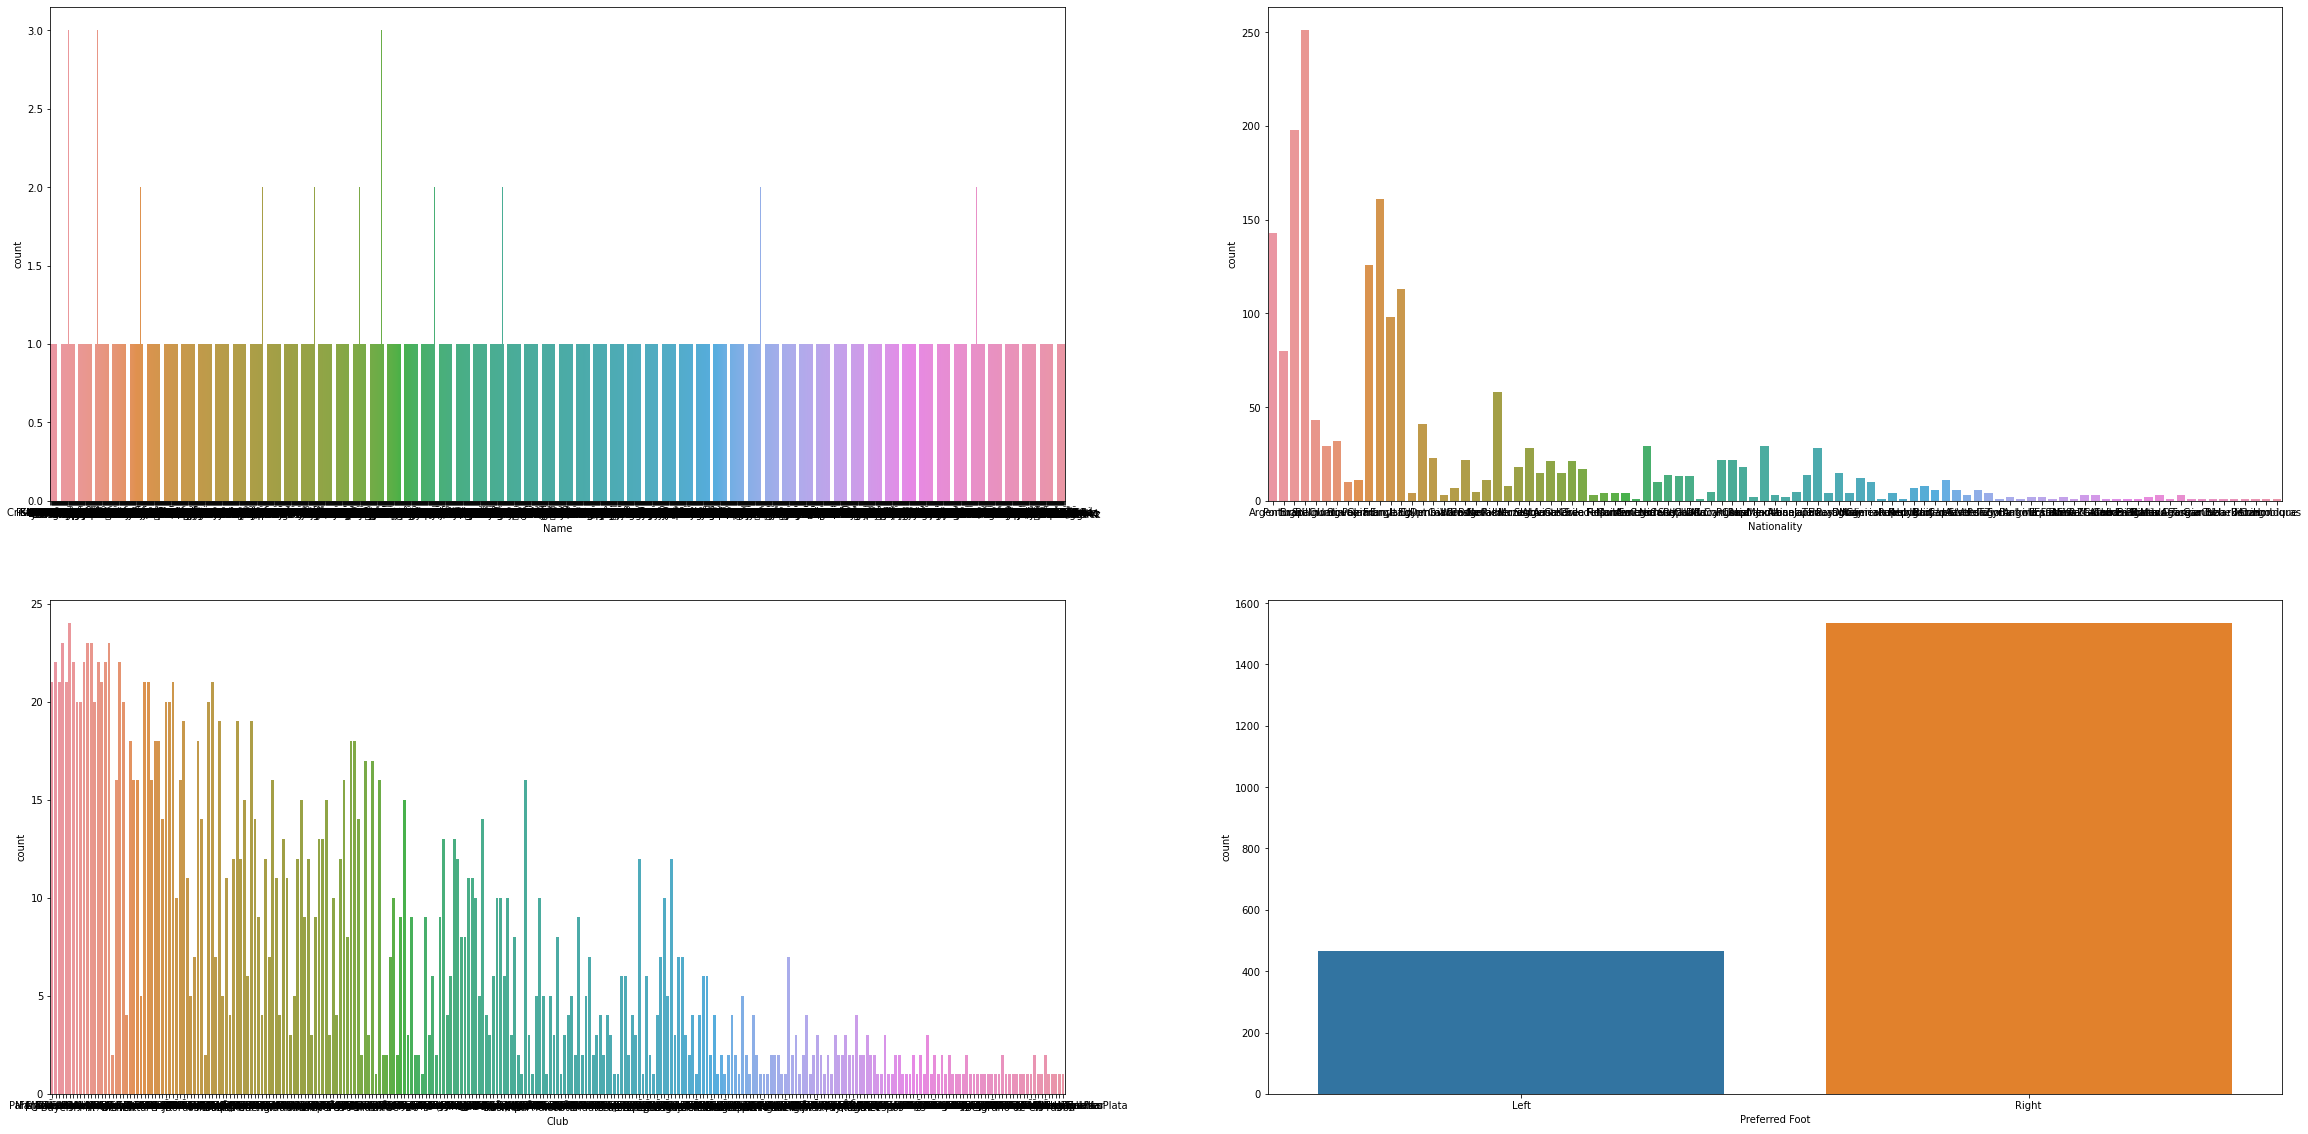

In [121]:
# Plotting the count plots in a loop for categorical attributes
rows=2
cols=2
counter=1
for i in cat:
    plt.subplot(rows,cols,counter)
    sns.countplot(fifa[i])
    plt.xticks()
    counter+=1
    
    
plt.tight_layout()
plt.show()
    

In [ ]:
# Now Nationality and Club columns is left as they have a lot of unique values
# we will plot top 15 Nationalities and Top 15 Clubs for the Players

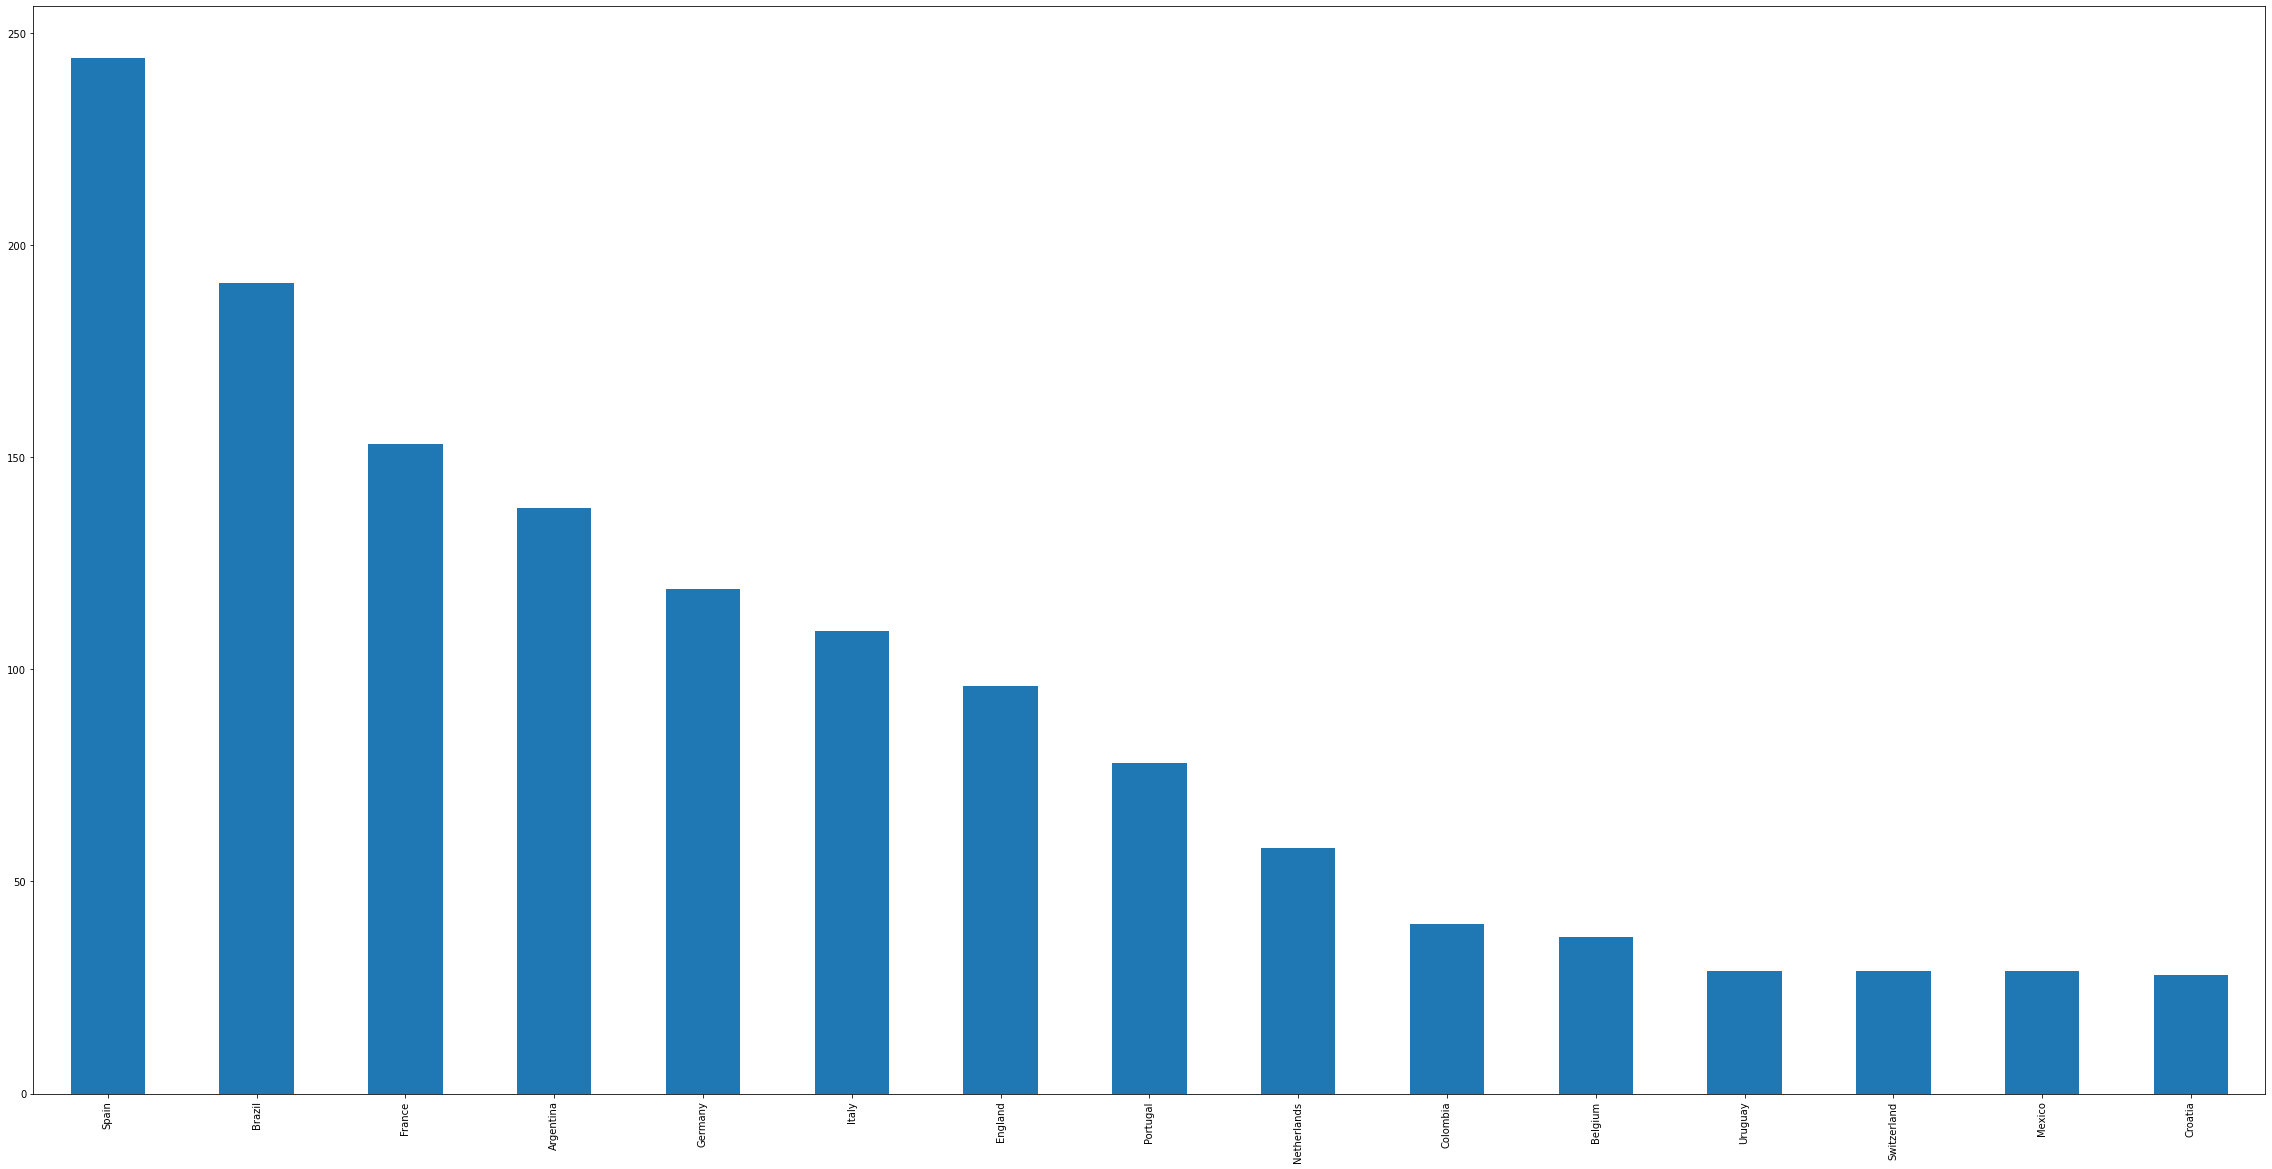

In [79]:
fifa.Nationality.value_counts().sort_values(ascending=False).head(15).plot(kind='bar')
plt.show()

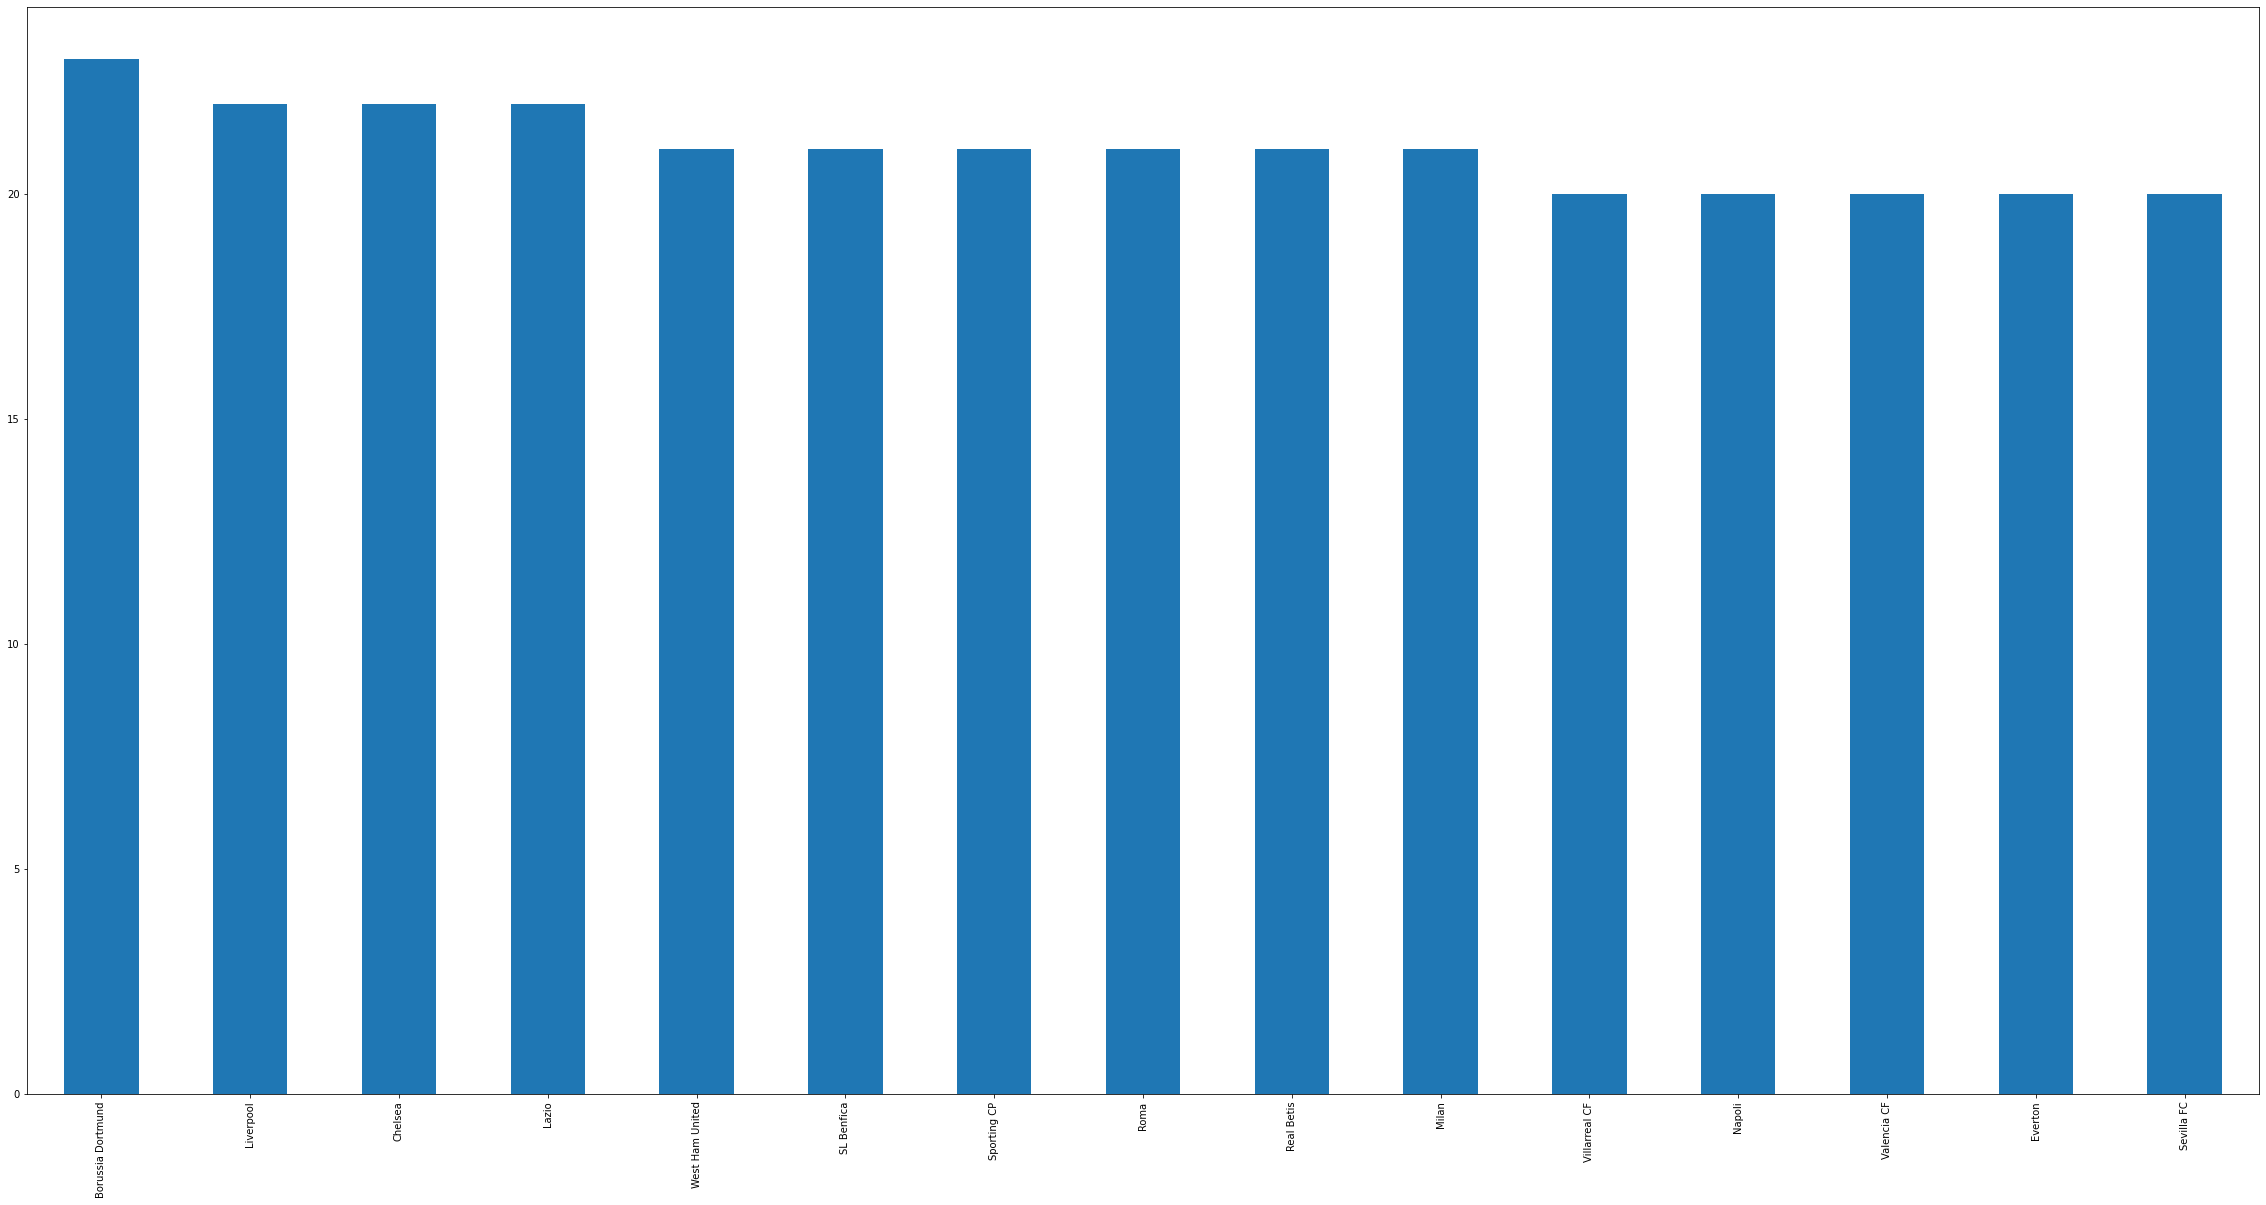

In [81]:
fifa.Club.value_counts().sort_values(ascending=False).head(15).plot(kind='bar')
plt.show()

# Statistical Infernces::
Age Column seems to be normally distributed
Overall rating seems to be right-skewed
Potential seems to be right-skewed as well
Internationtional reputaion seems to be multimodal . It could indicate the column as discrete
Weak foot and skill moves seem to be multimodal and discrete as well
Height seems to be multimodal but not discrete
Weight seems to be normally distributed
There are more right-footed players than left footed
Medium/Medium seems to be the most frequent work rate
GK is the most common position in the data

# Statistical Analysis Testing

###a) With 95% & 99% Confidence Interval, find the range estimate of average duration calls made by the entire network. Which of the Intervals are wider? Interpret the results¶

In [85]:
# For 95 % Confidence Interval
cl=0.95 # confidence level
alpha=1-cl # Significance level 
xbar=mobile.duration.mean() # Sample mean 
n=len(mobile.duration)  # Sample size 
s=np.std(mobile.duration) # sample standard deviation
t_crit=stats.t.isf(alpha/2,n-1)
se=s/np.sqrt(n) # Standard Error

In [86]:
ci_95=stats.norm.interval(0.95,xbar,se) # confidence interval for 95 % confidence level

In [88]:
print('confidence Interval at 95 % is ',ci_95)

confidence Interval at 95 % is  (141.1797470762666, 147.4301240434043)


In [ ]:
# For 99 % confidence Level :

In [89]:
ci_99=stats.norm.interval(0.99,xbar,se)

In [91]:
print('confidence Interval at 99% is ',ci_99)

confidence Interval at 99% is  (140.1977416835259, 148.41212943614502)


In [92]:
# As we can clearly see, the confidence interval for 99% confidence level is wider than the confidence interval for 95%
# This means that as the confidence level increases, our confidence interval increases

# c) Plot the distribution of duration with respect to each network in the same graph and interpret the results from the graph¶

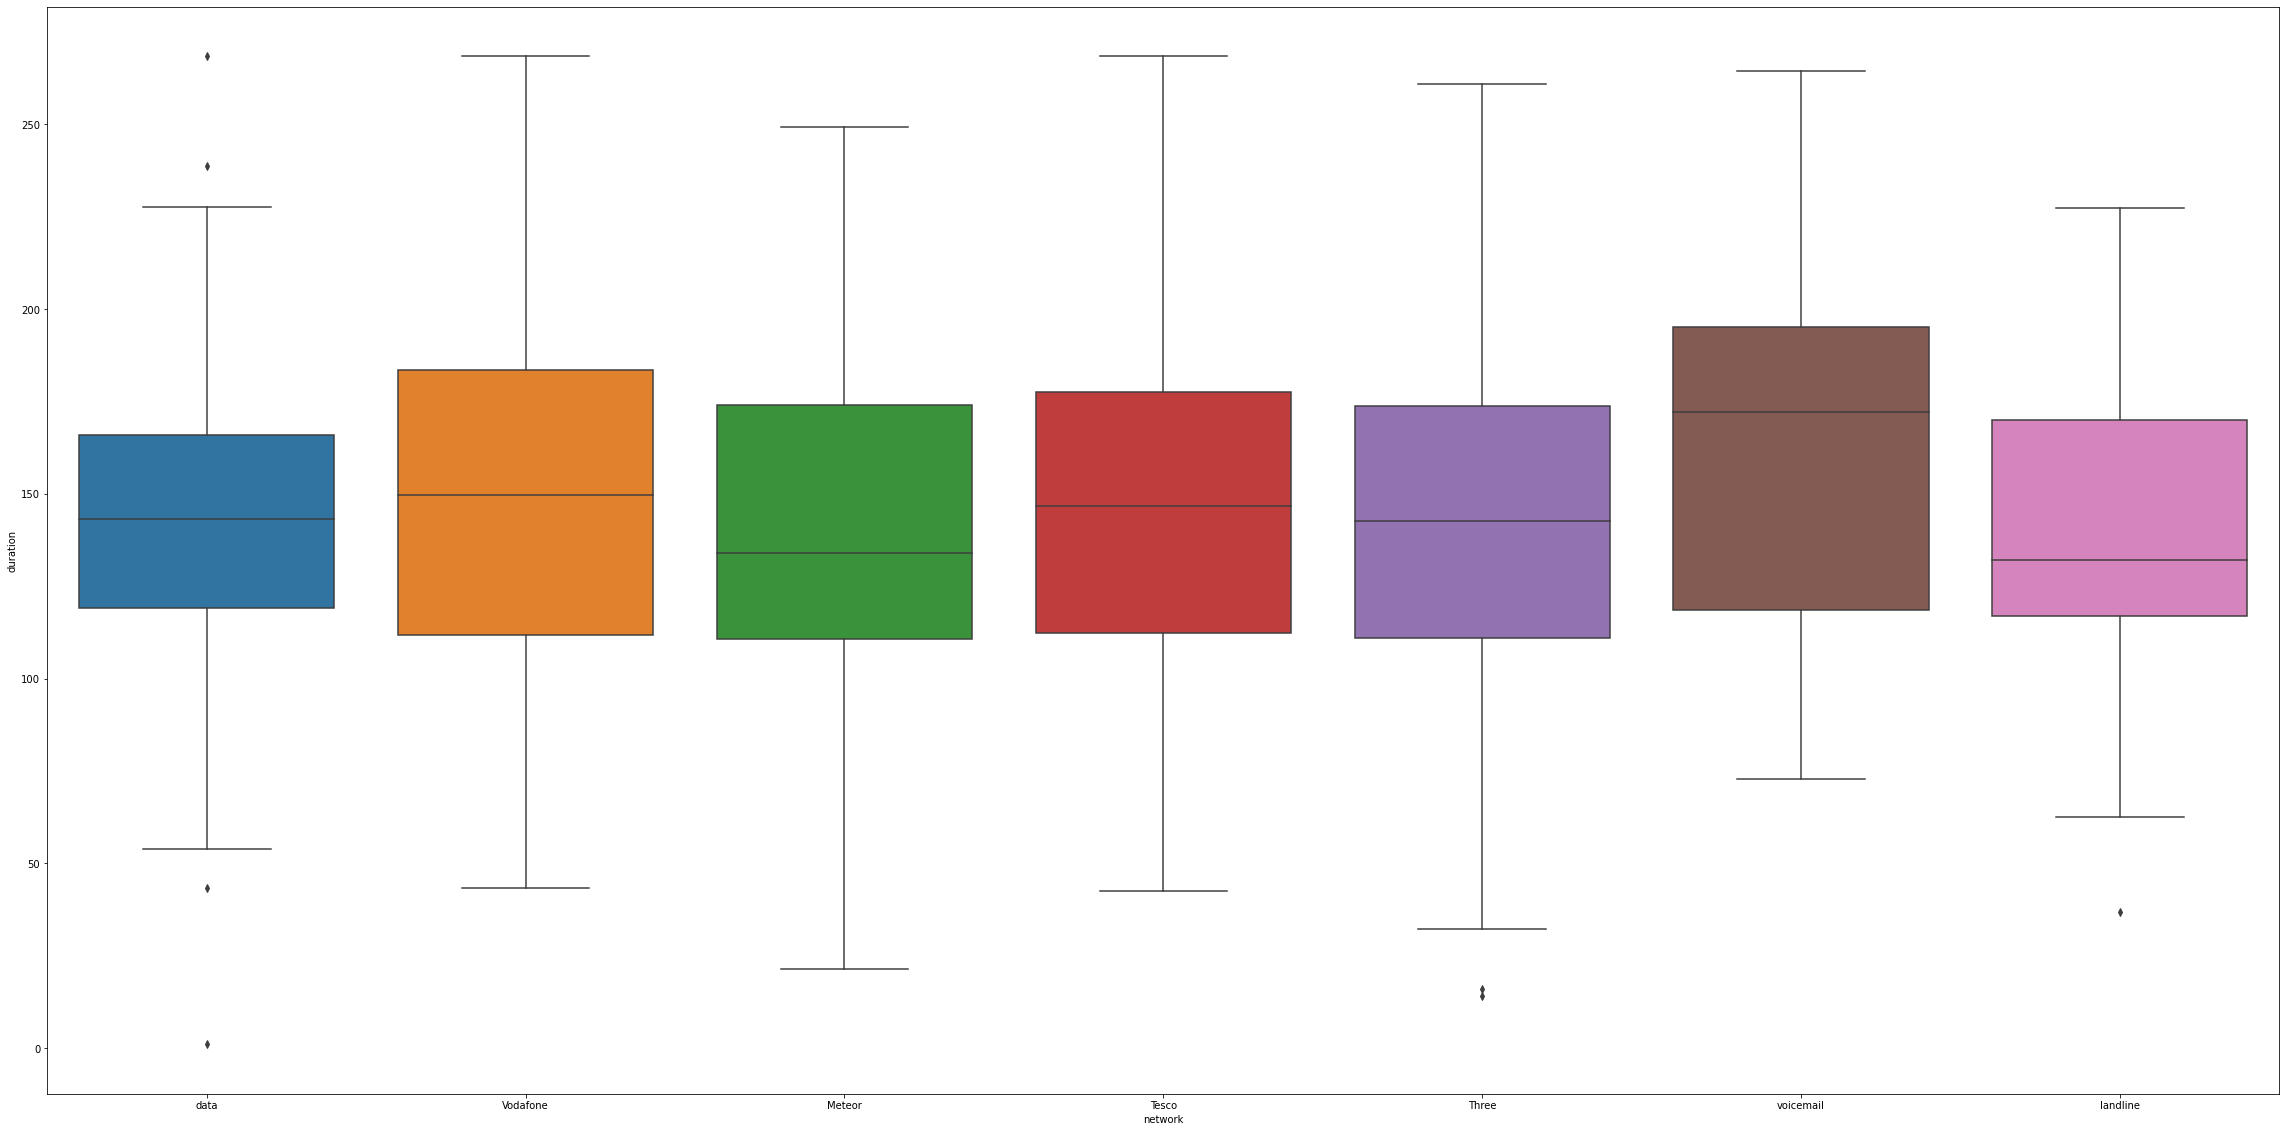

In [93]:
sns.boxplot(x='network',y='duration',data=mobile)
plt.show()

# d) Perform statistical tests to identify the relation between item and duration. Detailed explanation of relation between the classes is required.

In [95]:
mobile.head()

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile


In [96]:
# Grouping the duration columns with respect to Item 

In [97]:
mobile.item.unique()

array(['data', 'call', 'sms'], dtype=object)

In [98]:
data=mobile.loc[mobile.item=='data','duration']
call=mobile.loc[mobile.item=='call','duration']
sms=mobile.loc[mobile.item=='sms','duration']

In [99]:
# First we will perform the Normality test that is Shapiro Wilk test:


In [100]:
stats.shapiro(data),stats.shapiro(call),stats.shapiro(sms)

(ShapiroResult(statistic=0.9912639856338501, pvalue=0.48521795868873596),
 ShapiroResult(statistic=0.9973042011260986, pvalue=0.7803382277488708),
 ShapiroResult(statistic=0.9943404197692871, pvalue=0.37839275598526))

In [ ]:
# As we can see the P value is much greater than significance level.
# Hence as it is clearly visible that the data is normally distributed 


In [104]:
# Now we will perform the variance test that is Levene test


In [105]:
stats.levene(data,call,sms)

LeveneResult(statistic=3.4300976447008478, pvalue=0.03285087780533987)

In [106]:
# As it is clearly visible that the P value is less than significance level
# Hence we cannot perform any parametric test here because second condition is not met 
# Thus we have to perform the Kruskal-wallis test 


In [109]:
# HO:: Item has no impact on the duration 
# HA:: Item has some impact on the duration 

In [110]:
stats.kruskal(data,call,sms)

KruskalResult(statistic=3.5659414348706377, pvalue=0.16813791437741693)

In [111]:
# As per the test results the P value is greater than the significance level.
# Therefore we fail to reject the null hypothesis 
# Hence there is no relation between Item and duration 

# e) Perform statistical tests to identify the relation between network and network_type.

In [112]:
mobile

,date,duration,item,month,network,network_type
0,15-10-14 6:58,221.321120,data,2014-11,data,data
1,15-10-14 6:58,81.610599,call,2014-11,Vodafone,mobile
2,15-10-14 14:46,143.109111,call,2014-11,Meteor,mobile
3,15-10-14 14:48,111.888670,call,2014-11,Tesco,mobile
4,15-10-14 17:27,246.695171,call,2014-11,Tesco,mobile
...,...,...,...,...,...,...
815,10-03-15 6:58,185.328156,data,2015-03,data,data
816,11-03-15 6:58,89.819383,data,2015-03,data,data
817,12-03-15 6:58,117.604998,data,2015-03,data,data
818,13-03-15 0:39,77.834006,sms,2015-03,Vodafone,mobile


In [114]:
# As both the columns are categorical so we will perform Chisq test
# for that we need to make the contingency table 

In [116]:
# Ho: network and network_type has no relation in between 
# HA: network and network type has some realtion in between 


tbl=pd.crosstab(mobile.network,mobile.network_type)


test_statistics,pvalue,dof,exp=stats.chi2_contingency(tbl)

In [117]:
print(test_statistics,pvalue)

2460.0 0.0


In [119]:
# As we can see the P value is 0 
# Therfore we have rejected our null hypothesis 
# we conclude that tnetwork and network type has some relation

# THE END